In [1]:
import os
os.chdir('../')
%pwd

'd:\\Machine_Learning\\Consignment-Pricing-Prediction'

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("artifacts\data_ingestion\SCMS_Delivery_History_Dataset.csv")
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [6]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [7]:
df.nunique()[:10]

ID                  10324
Project Code          142
PQ #                 1237
PO / SO #            6233
ASN/DN #             7030
Country                43
Managed By              4
Fulfill Via             2
Vendor INCO Term        8
Shipment Mode           4
dtype: int64

In [8]:
df[df.columns[:10]].head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air


In [9]:
df.isnull().sum()[:10]

ID                    0
Project Code          0
PQ #                  0
PO / SO #             0
ASN/DN #              0
Country               0
Managed By            0
Fulfill Via           0
Vendor INCO Term      0
Shipment Mode       360
dtype: int64

In [10]:
df.nunique()[:10].sum

<bound method Series.sum of ID                  10324
Project Code          142
PQ #                 1237
PO / SO #            6233
ASN/DN #             7030
Country                43
Managed By              4
Fulfill Via             2
Vendor INCO Term        8
Shipment Mode           4
dtype: int64>

In [11]:
Columns_to_keep = ['Project Code', 'PQ #', 'Country', 'Managed By', 'Fulfill Via','Vendor INCO Term','Shipment Mode','PQ First Sent to Client Date']

In [12]:
df[df.columns[8:18]].head()

,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor
0,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.
1,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited
2,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG
3,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...
4,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited


In [13]:
df= df.dropna()

In [14]:
df.shape

(8158, 33)

In [15]:
df.nunique()

ID                              8158
Project Code                      90
PQ #                             877
PO / SO #                       4750
ASN/DN #                        5242
Country                           34
Managed By                         2
Fulfill Via                        2
Vendor INCO Term                   7
Shipment Mode                      4
PQ First Sent to Client Date     581
PO Sent to Vendor Date           565
Scheduled Delivery Date         1630
Delivered to Client Date        1743
Delivery Recorded Date          1676
Product Group                      3
Sub Classification                 4
Vendor                            42
Item Description                 136
Molecule/Test Type                41
Brand                             25
Dosage                            53
Dosage Form                       15
Unit of Measure (Per Pack)        21
Line Item Quantity              4487
Line Item Value                 7404
Pack Price                      1042
U

In [16]:
df.drop('ID', inplace=True, axis=1)
df.drop(columns=['ASN/DN #','PO / SO #'], inplace=True, axis=1)

In [17]:
df.shape

(8158, 30)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8158 entries, 21 to 10323
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Project Code                  8158 non-null   object 
 1   PQ #                          8158 non-null   object 
 2   Country                       8158 non-null   object 
 3   Managed By                    8158 non-null   object 
 4   Fulfill Via                   8158 non-null   object 
 5   Vendor INCO Term              8158 non-null   object 
 6   Shipment Mode                 8158 non-null   object 
 7   PQ First Sent to Client Date  8158 non-null   object 
 8   PO Sent to Vendor Date        8158 non-null   object 
 9   Scheduled Delivery Date       8158 non-null   object 
 10  Delivered to Client Date      8158 non-null   object 
 11  Delivery Recorded Date        8158 non-null   object 
 12  Product Group                 8158 non-null   object 
 13  Sub Cl

In [19]:
df[df.columns[8:18]].nunique()

PO Sent to Vendor Date       565
Scheduled Delivery Date     1630
Delivered to Client Date    1743
Delivery Recorded Date      1676
Product Group                  3
Sub Classification             4
Vendor                        42
Item Description             136
Molecule/Test Type            41
Brand                         25
dtype: int64

In [20]:
df[df.columns[8:18]].head()

,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand
21,7/13/07,2-Oct-07,2-Oct-07,2-Oct-07,ARV,Pediatric,BRISTOL-MYERS SQUIBB,"#102198**Didanosine 200mg [Videx], tablets, 60...",Didanosine,Videx
22,7/4/07,15-Oct-07,15-Oct-07,15-Oct-07,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic
23,7/4/07,27-Aug-07,27-Aug-07,27-Aug-07,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia
29,10/3/07,20-Nov-07,20-Nov-07,20-Nov-07,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic
32,11/19/07,21-Jan-08,21-Jan-08,21-Jan-08,ARV,Adult,"GILEAD SCIENCES IRELAND, INC.","Tenofovir Disoproxil Fumarate 300mg [Viread], ...",Tenofovir Disoproxil Fumarate,Viread


In [21]:
df['PO Sent to Vendor Date'].value_counts()

PO Sent to Vendor Date
N/A - From RDC       4905
Date Not Captured     225
3/19/10                78
8/29/14                76
10/9/14                69
                     ... 
1/7/11                  1
4/4/11                  1
4/20/12                 1
12/9/13                 1
8/29/12                 1
Name: count, Length: 565, dtype: int64

In [22]:
df.drop('PO Sent to Vendor Date', inplace=True, axis=1)

In [23]:
df[df.columns[8:18]].nunique()

Scheduled Delivery Date     1630
Delivered to Client Date    1743
Delivery Recorded Date      1676
Product Group                  3
Sub Classification             4
Vendor                        42
Item Description             136
Molecule/Test Type            41
Brand                         25
Dosage                        53
dtype: int64

In [24]:
df['Scheduled Delivery Date'].isna().sum()
Columns_to_keep.append('Scheduled Delivery Date')

In [25]:
df['Delivered to Client Date'].isnull().sum()

0

In [26]:
df['Delivered to Client Date'].unique()
Columns_to_keep.append('Delivered to Client Date')

In [27]:
df['Delivery Recorded Date'].unique()

array(['2-Oct-07', '15-Oct-07', '27-Aug-07', ..., '29-Mar-13', '7-Dec-13',
       '8-May-15'], dtype=object)

In [28]:
df['Delivery Recorded Date'].isna().sum()
Columns_to_keep.append('Delivery Recorded Date')

In [29]:
df[df.columns[8:18]].nunique()

Scheduled Delivery Date     1630
Delivered to Client Date    1743
Delivery Recorded Date      1676
Product Group                  3
Sub Classification             4
Vendor                        42
Item Description             136
Molecule/Test Type            41
Brand                         25
Dosage                        53
dtype: int64

In [30]:
df[df.columns[8:18]].head()

,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage
21,2-Oct-07,2-Oct-07,2-Oct-07,ARV,Pediatric,BRISTOL-MYERS SQUIBB,"#102198**Didanosine 200mg [Videx], tablets, 60...",Didanosine,Videx,200mg
22,15-Oct-07,15-Oct-07,15-Oct-07,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml
23,27-Aug-07,27-Aug-07,27-Aug-07,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg
29,20-Nov-07,20-Nov-07,20-Nov-07,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg
32,21-Jan-08,21-Jan-08,21-Jan-08,ARV,Adult,"GILEAD SCIENCES IRELAND, INC.","Tenofovir Disoproxil Fumarate 300mg [Viread], ...",Tenofovir Disoproxil Fumarate,Viread,300mg


In [31]:
df[df.columns[18:28]].nunique()

Dosage Form                     15
Unit of Measure (Per Pack)      21
Line Item Quantity            4487
Line Item Value               7404
Pack Price                    1042
Unit Price                     129
Manufacturing Site              60
First Line Designation           2
Weight (Kilograms)            4105
Freight Cost (USD)            5019
dtype: int64

In [32]:
df[df.columns[18:28]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8158 entries, 21 to 10323
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dosage Form                 8158 non-null   object 
 1   Unit of Measure (Per Pack)  8158 non-null   int64  
 2   Line Item Quantity          8158 non-null   int64  
 3   Line Item Value             8158 non-null   float64
 4   Pack Price                  8158 non-null   float64
 5   Unit Price                  8158 non-null   float64
 6   Manufacturing Site          8158 non-null   object 
 7   First Line Designation      8158 non-null   object 
 8   Weight (Kilograms)          8158 non-null   object 
 9   Freight Cost (USD)          8158 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 701.1+ KB


In [33]:
df['Dosage Form'].unique()

array(['Tablet', 'Oral suspension', 'Capsule', 'Powder for oral solution',
       'Chewable/dispersible tablet',
       'Delayed-release capsules - blister', 'Tablet - blister',
       'Tablet - FDC + blister', 'Tablet - FDC + co-blister',
       'Tablet - FDC', 'Oral solution', 'Injection',
       'Delayed-release capsules', 'Chewable/dispersible tablet - FDC',
       'Oral powder'], dtype=object)

In [34]:
df['Unit of Measure (Per Pack)'].isna().sum()

0

In [35]:
df['Line Item Quantity'].isna().sum()

0

In [36]:
df['Line Item Value'].isna().sum()

0

In [37]:
df['Pack Price'].isna().sum()

0

In [38]:
df['Unit Price'].isna().sum()

0

In [39]:
df['Manufacturing Site'].nunique()

60

In [40]:
df['Manufacturing Site'].value_counts()

Manufacturing Site
Aurobindo Unit III, India                                                   2978
Mylan (formerly Matrix) Nashik                                              1407
Hetero Unit III Hyderabad IN                                                 868
Cipla, Goa, India                                                            624
Strides, Bangalore, India.                                                   528
ABBVIE Ludwigshafen Germany                                                  350
ABBVIE (Abbott) Logis. UK                                                    204
BMS Meymac, France                                                           129
Aspen-OSD, Port Elizabeth, SA                                                125
MSD, Haarlem, NL                                                             117
Aurobindo Unit VII, IN                                                       111
Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, Hinjwadi, Pune, India      56
Janssen-C

In [41]:
df['First Line Designation'].isna().sum()

0

In [42]:
df['First Line Designation'].value_counts()

First Line Designation
Yes    5242
No     2916
Name: count, dtype: int64

In [43]:
df['Weight (Kilograms)'].nunique()

4105

In [44]:
df['Weight (Kilograms)'].value_counts()

Weight (Kilograms)
Weight Captured Separately    1311
76                              16
See DN-304 (ID#:10589)          16
6                               15
9                               15
                              ... 
11646                            1
See ASN-18558 (ID#:27015)        1
16496                            1
8826                             1
1392                             1
Name: count, Length: 4105, dtype: int64

In [45]:
df['Freight Cost (USD)'].nunique()

5019

In [46]:
df['Freight Cost (USD)'].value_counts()

Freight Cost (USD)
Freight Included in Commodity Cost    1321
Invoiced Separately                    150
9736.1                                  36
6147.18                                 27
7445.8                                  16
                                      ... 
14558.87                                 1
4520.66                                  1
8217.8                                   1
1637.86                                  1
See DN-4282 (ID#:83919)                  1
Name: count, Length: 5019, dtype: int64

In [56]:
to_drop = []
for i in df['Freight Cost (USD)']:
    try:
        float(i)
    except:
        to_drop.append(i)

In [57]:
to_drop

['Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'See ASN-3562 (ID#:960)',
 'Freight Included in Commodity Cost',
 'See ASN-3675 (ID#:1046)',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight Included in Commodity Cost',
 'Freight

In [58]:
df= df[df['Freight Cost (USD)'].isin(to_drop)==False]

In [59]:
df.shape

(4582, 29)

In [61]:
df['Freight Cost (USD)'].value_counts

<bound method IndexOpsMixin.value_counts of 22        4193.49
23        1767.38
29       12237.61
32        2282.57
33        2149.05
           ...   
10305    28277.42
10306      1653.9
10310     3785.72
10315       26180
10316        3410
Name: Freight Cost (USD), Length: 4582, dtype: object>

In [62]:
df.shape

(4582, 29)

In [63]:
df[df.columns[28:38]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4582 entries, 22 to 10316
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Line Item Insurance (USD)  4582 non-null   float64
dtypes: float64(1)
memory usage: 71.6 KB


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4582 entries, 22 to 10316
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Project Code                  4582 non-null   object 
 1   PQ #                          4582 non-null   object 
 2   Country                       4582 non-null   object 
 3   Managed By                    4582 non-null   object 
 4   Fulfill Via                   4582 non-null   object 
 5   Vendor INCO Term              4582 non-null   object 
 6   Shipment Mode                 4582 non-null   object 
 7   PQ First Sent to Client Date  4582 non-null   object 
 8   Scheduled Delivery Date       4582 non-null   object 
 9   Delivered to Client Date      4582 non-null   object 
 10  Delivery Recorded Date        4582 non-null   object 
 11  Product Group                 4582 non-null   object 
 12  Sub Classification            4582 non-null   object 
 13  Vendor

In [70]:
df[df.columns[:10]].head()

,Project Code,PQ #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,Scheduled Delivery Date,Delivered to Client Date
22,108-VN-T01,Pre-PQ Process,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,15-Oct-07,15-Oct-07
23,108-VN-T01,Pre-PQ Process,Vietnam,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,27-Aug-07,27-Aug-07
29,117-ET-T01,Pre-PQ Process,Ethiopia,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,20-Nov-07,20-Nov-07
32,108-VN-T01,Pre-PQ Process,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,21-Jan-08,21-Jan-08
33,108-VN-T01,Pre-PQ Process,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,21-Jan-08,21-Jan-08


In [83]:
df['Scheduled_Delivery_Date_D'] = [i.split('-')[0] for i in df['Scheduled Delivery Date']]

In [85]:
df['Scheduled_Delivery_Date_M'] = [i.split('-')[1] for i in df['Scheduled Delivery Date']]
df['Scheduled_Delivery_Date_Y'] = [i.split('-')[2] for i in df['Scheduled Delivery Date']]

In [86]:
df['Delivered_to_Client_Date_D'] = [i.split('-')[0] for i in df['Delivered to Client Date']]
df['Delivered_to_Client_Date_M'] = [i.split('-')[1] for i in df['Delivered to Client Date']]
df['Delivered_to_Client_Date_Y'] = [i.split('-')[2] for i in df['Delivered to Client Date']]

In [87]:
df.shape

(4582, 35)

In [88]:
df.drop(columns=['Delivered to Client Date', 'Scheduled Delivery Date'], inplace=True, axis= 1)

In [89]:
df.shape

(4582, 33)

In [90]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 4582 entries, 22 to 10316
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Project Code                  4582 non-null   object 
 1   PQ #                          4582 non-null   object 
 2   Country                       4582 non-null   object 
 3   Managed By                    4582 non-null   object 
 4   Fulfill Via                   4582 non-null   object 
 5   Vendor INCO Term              4582 non-null   object 
 6   Shipment Mode                 4582 non-null   object 
 7   PQ First Sent to Client Date  4582 non-null   object 
 8   Delivery Recorded Date        4582 non-null   object 
 9   Product Group                 4582 non-null   object 
 10  Sub Classification            4582 non-null   object 
 11  Vendor                        4582 non-null   object 
 12  Item Description              4582 non-null   object 
 13  Molecu

In [91]:
df[df.columns[:10]].head()

,Project Code,PQ #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,Delivery Recorded Date,Product Group
22,108-VN-T01,Pre-PQ Process,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,15-Oct-07,ARV
23,108-VN-T01,Pre-PQ Process,Vietnam,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,27-Aug-07,ARV
29,117-ET-T01,Pre-PQ Process,Ethiopia,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,20-Nov-07,ARV
32,108-VN-T01,Pre-PQ Process,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,21-Jan-08,ARV
33,108-VN-T01,Pre-PQ Process,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,21-Jan-08,ARV


In [92]:
df[df.columns[11:21]].head()

,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price
22,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,1920.0,1.92
23,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120,500,41095.0,82.19
29,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,64000,99200.0,1.55
32,"GILEAD SCIENCES IRELAND, INC.","Tenofovir Disoproxil Fumarate 300mg [Viread], ...",Tenofovir Disoproxil Fumarate,Viread,300mg,Tablet,30,1000,17000.0,17.00
33,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Zidovudine 300mg, tablets, 60 Tabs",Zidovudine,Generic,300mg,Tablet,60,400,3352.0,8.38


In [101]:
df[df.columns[11:21]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4582 entries, 22 to 10316
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Vendor                      4582 non-null   string 
 1   Item Description            4582 non-null   string 
 2   Molecule/Test Type          4582 non-null   string 
 3   Brand                       4582 non-null   string 
 4   Dosage                      4582 non-null   string 
 5   Dosage Form                 4582 non-null   string 
 6   Unit of Measure (Per Pack)  4582 non-null   Int64  
 7   Line Item Quantity          4582 non-null   Int64  
 8   Line Item Value             4582 non-null   Float64
 9   Pack Price                  4582 non-null   Float64
dtypes: Float64(2), Int64(2), string(6)
memory usage: 411.7 KB


In [102]:
df[df.columns[21:31]].head()

,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Scheduled_Delivery_Date_D,Scheduled_Delivery_Date_M,Scheduled_Delivery_Date_Y,Delivered_to_Client_Date_D
22,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07,15,Oct,07,15
23,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75,27,Aug,07,27
29,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72,20,Nov,07,20
32,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,2282.57,27.2,21,Jan,08,21
33,0.14,"Ranbaxy, Paonta Shahib, India",Yes,23,2149.05,5.36,21,Jan,08,21


In [103]:
df[df.columns[21:31]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4582 entries, 22 to 10316
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unit Price                  4582 non-null   Float64
 1   Manufacturing Site          4582 non-null   string 
 2   First Line Designation      4582 non-null   string 
 3   Weight (Kilograms)          4582 non-null   string 
 4   Freight Cost (USD)          4582 non-null   string 
 5   Line Item Insurance (USD)   4582 non-null   Float64
 6   Scheduled_Delivery_Date_D   4582 non-null   string 
 7   Scheduled_Delivery_Date_M   4582 non-null   string 
 8   Scheduled_Delivery_Date_Y   4582 non-null   string 
 9   Delivered_to_Client_Date_D  4582 non-null   string 
dtypes: Float64(2), string(8)
memory usage: 402.7 KB


In [108]:
df['Weight (Kilograms)'].value_counts

<bound method IndexOpsMixin.value_counts of 22         941
23         117
29        4228
32          76
33          23
         ...  
10305    39688
10306     1504
10310     2253
10315    15198
10316     1547
Name: Weight (Kilograms), Length: 4582, dtype: string>

In [109]:
to_drop = []
for i in df['Weight (Kilograms)']:
    try:
        float(i)
    except:
        to_drop.append(i)

In [111]:
len(to_drop)

11

In [112]:
df= df[df['Weight (Kilograms)'].isin(to_drop)==False]

In [113]:
df.shape

(4571, 33)

In [115]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].astype(float)
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].astype(float)
df['Scheduled_Delivery_Date_D'] = df['Scheduled_Delivery_Date_D'].astype(float)
df['Scheduled_Delivery_Date_Y'] = df['Scheduled_Delivery_Date_Y'].astype(float)
df['Delivered_to_Client_Date_D'] = df['Delivered_to_Client_Date_D'].astype(float)

In [116]:
df[df.columns[21:31]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4571 entries, 22 to 10316
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unit Price                  4571 non-null   Float64
 1   Manufacturing Site          4571 non-null   string 
 2   First Line Designation      4571 non-null   string 
 3   Weight (Kilograms)          4571 non-null   float64
 4   Freight Cost (USD)          4571 non-null   float64
 5   Line Item Insurance (USD)   4571 non-null   Float64
 6   Scheduled_Delivery_Date_D   4571 non-null   float64
 7   Scheduled_Delivery_Date_M   4571 non-null   string 
 8   Scheduled_Delivery_Date_Y   4571 non-null   float64
 9   Delivered_to_Client_Date_D  4571 non-null   float64
dtypes: Float64(2), float64(5), string(3)
memory usage: 401.7 KB


In [117]:
df[df.columns[31:41]].head()

,Delivered_to_Client_Date_M,Delivered_to_Client_Date_Y
22,Oct,07
23,Aug,07
29,Nov,07
32,Jan,08
33,Jan,08


In [118]:
df[df.columns[31:41]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4571 entries, 22 to 10316
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Delivered_to_Client_Date_M  4571 non-null   string
 1   Delivered_to_Client_Date_Y  4571 non-null   string
dtypes: string(2)
memory usage: 107.1 KB


In [119]:
df['Delivered_to_Client_Date_Y'] = df['Delivered_to_Client_Date_Y'].astype(float)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4571 entries, 22 to 10316
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Project Code                  4571 non-null   string 
 1   PQ #                          4571 non-null   string 
 2   Country                       4571 non-null   string 
 3   Managed By                    4571 non-null   string 
 4   Fulfill Via                   4571 non-null   string 
 5   Vendor INCO Term              4571 non-null   string 
 6   Shipment Mode                 4571 non-null   string 
 7   PQ First Sent to Client Date  4571 non-null   string 
 8   Delivery Recorded Date        4571 non-null   string 
 9   Product Group                 4571 non-null   string 
 10  Sub Classification            4571 non-null   string 
 11  Vendor                        4571 non-null   string 
 12  Item Description              4571 non-null   string 
 13  Molecu

In [121]:
df.shape

(4571, 33)

In [122]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [130]:
df =df.apply(label_encoder.fit_transform)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4571 entries, 22 to 10316
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Project Code                  4571 non-null   int32
 1   PQ #                          4571 non-null   int32
 2   Country                       4571 non-null   int32
 3   Managed By                    4571 non-null   int32
 4   Fulfill Via                   4571 non-null   int32
 5   Vendor INCO Term              4571 non-null   int32
 6   Shipment Mode                 4571 non-null   int32
 7   PQ First Sent to Client Date  4571 non-null   int32
 8   Delivery Recorded Date        4571 non-null   int32
 9   Product Group                 4571 non-null   int32
 10  Sub Classification            4571 non-null   int32
 11  Vendor                        4571 non-null   int32
 12  Item Description              4571 non-null   int32
 13  Molecule/Test Type            4571 n

In [132]:
df.describe()

,Project Code,PQ #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,Delivery Recorded Date,Product Group,...,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Scheduled_Delivery_Date_D,Scheduled_Delivery_Date_M,Scheduled_Delivery_Date_Y,Delivered_to_Client_Date_D,Delivered_to_Client_Date_M,Delivered_to_Client_Date_Y
count,4571.000000,4571.000000,4571.000000,4571.0,4571.000000,4571.000000,4571.000000,4571.00000,4571.000000,4571.000000,...,4571.0,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,40.143732,493.785605,19.847517,0.0,0.628965,5.067819,0.962809,328.89499,782.821483,1.990155,...,0.0,1105.318092,1984.070882,1831.480858,16.985124,5.630278,4.418070,14.859549,5.690440,4.410195
std,14.810403,265.068695,7.918937,0.0,0.483135,1.499013,1.286326,175.34494,452.387613,0.124254,...,0.0,891.545381,1104.057950,1171.464636,9.628243,3.455157,2.176967,8.652668,3.449954,2.174644
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,256.000000,13.000000,0.0,0.000000,4.000000,0.000000,176.00000,389.500000,2.000000,...,0.0,256.000000,1041.500000,773.500000,9.000000,3.000000,3.000000,8.000000,3.000000,3.000000
50%,38.000000,531.000000,20.000000,0.0,1.000000,6.000000,0.000000,331.00000,774.000000,2.000000,...,0.0,948.000000,2041.000000,1784.000000,17.000000,6.000000,4.000000,15.000000,6.000000,4.000000
75%,47.000000,756.500000,27.000000,0.0,1.000000,6.000000,2.000000,509.00000,1180.500000,2.000000,...,0.0,1848.500000,2937.500000,2840.500000,27.000000,9.000000,6.000000,22.000000,9.000000,6.000000
max,80.000000,814.000000,30.000000,0.0,1.000000,6.000000,3.000000,546.00000,1581.000000,2.000000,...,0.0,2912.000000,3883.000000,3930.000000,30.000000,11.000000,8.000000,30.000000,11.000000,8.000000


In [136]:
corr = df.corr()
corr

,Project Code,PQ #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,Delivery Recorded Date,Product Group,...,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Scheduled_Delivery_Date_D,Scheduled_Delivery_Date_M,Scheduled_Delivery_Date_Y,Delivered_to_Client_Date_D,Delivered_to_Client_Date_M,Delivered_to_Client_Date_Y
Project Code,1.000000,0.052415,0.286381,NaN,-0.048845,-0.149958,0.054035,0.024789,0.000413,0.009568,...,NaN,0.246238,0.224755,0.297377,-0.065392,0.029385,-0.080048,-0.036095,0.049585,-0.081383
PQ #,0.052415,1.000000,0.003996,NaN,0.127652,0.015124,-0.113621,0.347132,0.011660,-0.056124,...,NaN,-0.074727,-0.056314,0.041907,-0.138974,-0.011866,-0.708952,-0.008680,-0.014077,-0.709735
Country,0.286381,0.003996,1.000000,NaN,-0.114994,-0.094357,0.216149,-0.012230,0.010757,0.056516,...,NaN,0.146515,0.045887,0.184368,-0.008252,0.043068,-0.015024,0.016035,0.071927,-0.017193
Managed By,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fulfill Via,-0.048845,0.127652,-0.114994,NaN,1.000000,0.809745,0.374959,0.094883,0.008862,0.103167,...,NaN,0.099236,0.101976,0.031181,0.205366,-0.004988,-0.116497,0.034903,-0.005384,-0.121070
Vendor INCO Term,-0.149958,0.015124,-0.094357,NaN,0.809745,1.000000,0.249494,0.044457,0.007519,0.056452,...,NaN,0.012677,0.102715,-0.062664,0.181442,0.003279,0.017595,0.045323,-0.002794,0.013213
Shipment Mode,0.054035,-0.113621,0.216149,NaN,0.374959,0.249494,1.000000,-0.114296,0.010857,0.059316,...,NaN,0.355611,0.146002,0.267805,0.159868,0.034865,0.240915,0.018404,0.049968,0.238095
PQ First Sent to Client Date,0.024789,0.347132,-0.012230,NaN,0.094883,0.044457,-0.114296,1.000000,-0.009454,-0.028902,...,NaN,-0.002280,0.006812,0.062491,-0.078050,0.039609,-0.474509,0.020362,0.020666,-0.476177
Delivery Recorded Date,0.000413,0.011660,0.010757,NaN,0.008862,0.007519,0.010857,-0.009454,1.000000,-0.027802,...,NaN,0.004716,0.007760,0.009254,0.026853,0.054120,-0.003894,0.066103,0.055254,-0.004863
Product Group,0.009568,-0.056124,0.056516,NaN,0.103167,0.056452,0.059316,-0.028902,-0.027802,1.000000,...,NaN,0.041618,0.003792,0.057533,0.019631,0.005791,0.028162,0.008890,-0.005069,0.029525


The columns First line Designation and the Managed By have no correlation in the matrix so dropping them

In [137]:
df.drop(['First Line Designation', 'Managed By'], axis=1, inplace=True)

In [143]:
corr = df.corr()
corr[:10]

,Project Code,PQ #,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,Delivery Recorded Date,Product Group,Sub Classification,...,Manufacturing Site,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Scheduled_Delivery_Date_D,Scheduled_Delivery_Date_M,Scheduled_Delivery_Date_Y,Delivered_to_Client_Date_D,Delivered_to_Client_Date_M,Delivered_to_Client_Date_Y
Project Code,1.000000,0.052415,0.286381,-0.048845,-0.149958,0.054035,0.024789,0.000413,0.009568,-0.189576,...,-0.023749,0.246238,0.224755,0.297377,-0.065392,0.029385,-0.080048,-0.036095,0.049585,-0.081383
PQ #,0.052415,1.000000,0.003996,0.127652,0.015124,-0.113621,0.347132,0.011660,-0.056124,-0.088757,...,-0.083138,-0.074727,-0.056314,0.041907,-0.138974,-0.011866,-0.708952,-0.008680,-0.014077,-0.709735
Country,0.286381,0.003996,1.000000,-0.114994,-0.094357,0.216149,-0.012230,0.010757,0.056516,-0.127002,...,0.045419,0.146515,0.045887,0.184368,-0.008252,0.043068,-0.015024,0.016035,0.071927,-0.017193
Fulfill Via,-0.048845,0.127652,-0.114994,1.000000,0.809745,0.374959,0.094883,0.008862,0.103167,-0.067392,...,0.088849,0.099236,0.101976,0.031181,0.205366,-0.004988,-0.116497,0.034903,-0.005384,-0.121070
Vendor INCO Term,-0.149958,0.015124,-0.094357,0.809745,1.000000,0.249494,0.044457,0.007519,0.056452,-0.022349,...,0.047932,0.012677,0.102715,-0.062664,0.181442,0.003279,0.017595,0.045323,-0.002794,0.013213
Shipment Mode,0.054035,-0.113621,0.216149,0.374959,0.249494,1.000000,-0.114296,0.010857,0.059316,-0.041144,...,0.141289,0.355611,0.146002,0.267805,0.159868,0.034865,0.240915,0.018404,0.049968,0.238095
PQ First Sent to Client Date,0.024789,0.347132,-0.012230,0.094883,0.044457,-0.114296,1.000000,-0.009454,-0.028902,-0.100175,...,-0.079429,-0.002280,0.006812,0.062491,-0.078050,0.039609,-0.474509,0.020362,0.020666,-0.476177
Delivery Recorded Date,0.000413,0.011660,0.010757,0.008862,0.007519,0.010857,-0.009454,1.000000,-0.027802,-0.026141,...,-0.014164,0.004716,0.007760,0.009254,0.026853,0.054120,-0.003894,0.066103,0.055254,-0.004863
Product Group,0.009568,-0.056124,0.056516,0.103167,0.056452,0.059316,-0.028902,-0.027802,1.000000,0.056508,...,-0.090041,0.041618,0.003792,0.057533,0.019631,0.005791,0.028162,0.008890,-0.005069,0.029525
Sub Classification,-0.189576,-0.088757,-0.127002,-0.067392,-0.022349,-0.041144,-0.100175,-0.026141,0.056508,1.000000,...,-0.196672,-0.208368,-0.188384,-0.408142,0.012979,-0.042533,0.140630,-0.024085,-0.045010,0.142561


In [141]:
import seaborn as sns

<Axes: >

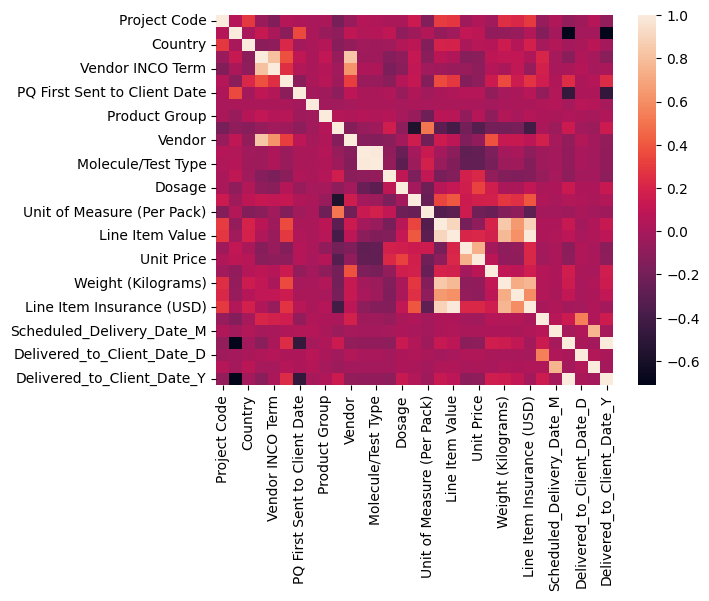

In [146]:
sns.heatmap(corr, annot=False)

In [149]:
y = df['Freight Cost (USD)']
x = df.drop('Freight Cost (USD)', axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [150]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((3656, 30), (915, 30), (3656,), (915,))

In [ ]:
from sklearn